>- The line used to separate the dataset is called a separating hyperplane. 
-  The points closest to the separating hyperplane are known as support vectors.

The distance from a point to the separating plane is given by :
$$\frac{w^Tx+b}{|w|}$$
or:
$$\frac{Ax+by+c}{\sqrt{A^2+B^2}}$$

In [1]:
import numpy as np

def loadDataSet(fileName):
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]),float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat, labelMat

In [2]:
def selectJrand(i,m):
    j = i
    while(j==i):
        j = int(np.random.uniform(0,m))
    return j

In [3]:
def clipAlpha(aj,H,L):
    if aj>H:
        aj = H
    if L>aj:
        aj = L
    return aj

In [4]:
dataArr, labelArr = loadDataSet('./src/testSet.txt')
print(labelArr)

[-1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]


 - The simplified SMO algorithm 

In [5]:
def smoSimple(dataMatIn, classLabels, C, toler, maxIter):
    # 输入的参数为数据集，类别标签，常数C，容错率和最大迭代数
    dataMatrix = np.mat(dataMatIn)
    labelMat = np.mat(classLabels).transpose()
    b = 0
    m, n = np.shape(dataMatrix)
    alphas = np.mat(np.zeros((m, 1)))
    iter = 0
    while(iter < maxIter):
        alphaPairsChanged = 0
        for i in range(m):
            # 计算当前alphas参数下的函数值
            fXi = float(np.multiply(alphas, labelMat).T*(dataMatrix*dataMatrix[i, :].T))+b
            # 计算差值
            Ei = fXi - float(labelMat[i])
            #
            if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or (labelMat[i]*Ei > toler and alphas[i] > 0):
                j = selectJrand(i, m)
                fXj = float(np.multiply(alphas, labelMat).T*(dataMatrix*dataMatrix[j, :].T))+b
                Ej = fXj - float(labelMat[j])
                alphaIold = alphas[i].copy()
                alphaJold = alphas[j].copy()

                if labelMat[i] != labelMat[j]:
                    L = max(0, alphas[j]-alphas[i])
                    H = min(C, C+alphas[j]-alphas[i])
                else:
                    L = max(0, alphas[j]+alphas[i]-C)
                    H = min(C, alphas[j]+alphas[i])
                if L == H:
                    print("L==H")
                    continue
                eta = 2.0*dataMatrix[i, :]*dataMatrix[j, :].T - dataMatrix[i, :] * \
                    dataMatrix[i, :].T - dataMatrix[j, :]*dataMatrix[j, :].T
                if eta >= 0:
                    print("eta>=0")
                    continue
                alphas[j] -= labelMat[j]*(Ei - Ej)/eta
                alphas[j] = clipAlpha(alphas[j], H, L)
                if abs(alphas[j]-alphaJold) < 0.00001:
                    print("j not moving enough")
                    continue
                alphas[i] += labelMat[j]*labelMat[i] * (alphaJold - alphas[j])

                b1 = b-Ei - labelMat[i] * (alphas[i]-alphaIold)*dataMatrix[i, :] * dataMatrix[i, :].T \
                    - labelMat[j]*(alphas[j]-alphaJold) * dataMatrix[i, :]*dataMatrix[j, :].T
                b2 = b - Ej - labelMat[i]*(alphas[i]-alphaIold) * dataMatrix[i, :]*dataMatrix[j, :].T \
                    - labelMat[j]*(alphas[j]-alphaJold) * dataMatrix[j, :]*dataMatrix[j, :].T

                if (0 < alphas[i]) and (C > alphas[i]):
                    b = b1
                elif (0 < alphas[j]) and (C > alphas[j]):
                    b = b2
                else:
                    b = (b1 + b2)/2.0
                alphaPairsChanged += 1
                print("iter: %d i:%d, pairs changed %d" % (iter, i, alphaPairsChanged))
        if (alphaPairsChanged == 0):
            iter += 1
        else:
            iter = 0
        print("iteration number: %d" % iter)

    return b, alphas

L==H
iter: 0 i:1, pairs changed 1
iter: 0 i:3, pairs changed 2
iter: 0 i:4, pairs changed 3
j not moving enough
iter: 0 i:8, pairs changed 4
iter: 0 i:13, pairs changed 5
L==H
iter: 0 i:17, pairs changed 6
iter: 0 i:18, pairs changed 7
j not moving enough
j not moving enough
L==H
iter: 0 i:26, pairs changed 8
L==H
j not moving enough
iter: 0 i:54, pairs changed 9
iter: 0 i:91, pairs changed 10
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iter: 0 i:18, pairs changed 1
iter: 0 i:22, pairs changed 2
L==H
j not moving enough
L==H
L==H
L==H
j not moving enough
j not moving enough
j not moving enough
j not moving enough
L==H
iter: 0 i:69, pairs changed 3
j not moving enough
iteration number: 0
iter: 0 i:0, pairs changed 1
iter: 0 i:1, pairs changed 2
j not moving enough
iter: 0 i:4, pairs changed 3
L==H
j not moving enough
j not moving eno

j not moving enough
j not moving enough
j not moving enough
iteration number: 4
j not moving enough
j not moving enough
j not moving enough
iteration number: 5
j not moving enough
j not moving enough
j not moving enough
iteration number: 6
j not moving enough
j not moving enough
j not moving enough
iteration number: 7
j not moving enough
j not moving enough
j not moving enough
iteration number: 8
j not moving enough
j not moving enough
j not moving enough
iteration number: 9
j not moving enough
j not moving enough
j not moving enough
iteration number: 10
iter: 10 i:29, pairs changed 1
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
j not moving enough
iteration number: 2
iter: 2 i:17, pairs changed 1
j not moving enough
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
iteration number: 

j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 3
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 4
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 5
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 6
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 7
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 8
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 9
j not moving enough
j not moving enough
j not moving enough
iteration number: 10
j not moving enough

j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 16
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 17
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 18
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 19
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 20
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 21
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 22
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iter: 22 i:55, pairs changed 1
iteration number: 0
j not moving enough
j 

j not moving enough
j not moving enough
j not moving enough
iteration number: 6
j not moving enough
j not moving enough
iter: 6 i:52, pairs changed 1
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
iter: 0 i:55, pairs changed 1
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 3
iter: 3 i:17, pairs changed 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
j not movi

j not moving enough
j not moving enough
iteration number: 14
j not moving enough
j not moving enough
iteration number: 15
j not moving enough
j not moving enough
iteration number: 16
j not moving enough
j not moving enough
iteration number: 17
j not moving enough
j not moving enough
iteration number: 18
j not moving enough
j not moving enough
iteration number: 19
j not moving enough
j not moving enough
iteration number: 20
j not moving enough
j not moving enough
iteration number: 21
j not moving enough
j not moving enough
iteration number: 22
j not moving enough
j not moving enough
iteration number: 23
j not moving enough
j not moving enough
iteration number: 24
j not moving enough
j not moving enough
iteration number: 25
j not moving enough
j not moving enough
iteration number: 26
j not moving enough
j not moving enough
iteration number: 27
j not moving enough
j not moving enough
iteration number: 28
j not moving enough
j not moving enough
iteration number: 29
j not moving enough
j no

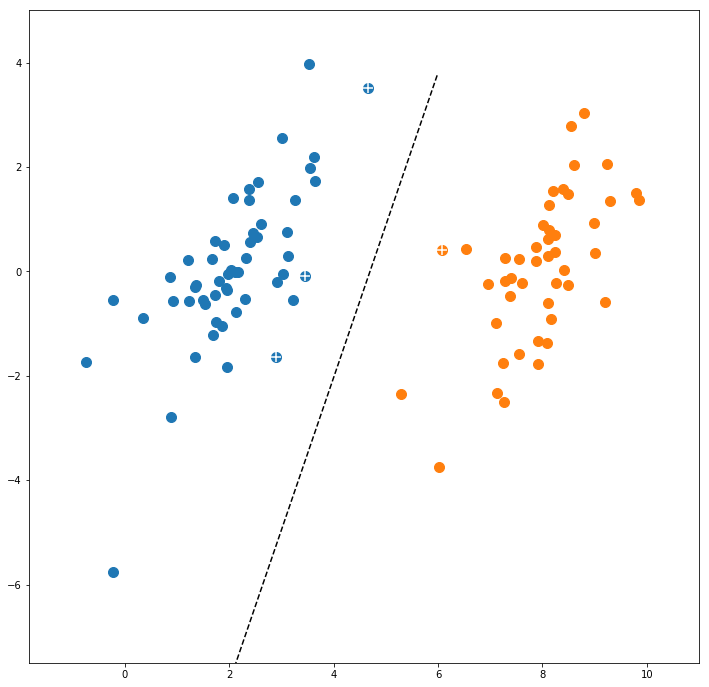

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
dataArr, labelArr = loadDataSet('./src//testSet.txt')

xdata0 = []
ydata0 = []

xdata1 = []
ydata1 = []

for i in range(len(labelArr)):
    if labelArr[i] == 1:
        xdata1.append(dataArr[i][0])
        ydata1.append(dataArr[i][1])
    else:
        xdata0.append(dataArr[i][0])
        ydata0.append(dataArr[i][1])

plt.figure(figsize=(12,12))
plt.axis('equal')
plt.scatter(xdata0, ydata0, s=100)
plt.scatter(xdata1, ydata1, s=100)

b, alphas = smoSimple(dataArr, labelArr, 0.6, 0.001, 40)

IndexAlphas = np.nonzero(alphas > 0)[0]
supportVec = np.array(dataArr)[IndexAlphas]
w = np.zeros((1, 2))

for i in IndexAlphas:
    w = w+alphas[i]*labelArr[i]*dataArr[i]

print(w.getA()[0])
print(supportVec[np.nonzero(np.array(labelArr)[IndexAlphas] == 1)]*(w.T))
MinPosDis = (supportVec[np.nonzero(np.array(labelArr)[IndexAlphas] == 1)]*(w.T)).min()
maxNegDis = (supportVec[np.nonzero(np.array(labelArr)[IndexAlphas] == -1)]*(w.T)).min()

b = -(MinPosDis+maxNegDis)/2.0
w = w.getA()[0]
x = np.arange(2, 6, 0.01,)
plt.plot(x, (-b-w[0]*x)/w[1], 'k--')
plt.ylim([-7.5,5])
plt.scatter(supportVec[:, 0], supportVec[:, 1], s=100, marker='+', c='white')

plt.show()
